##1. Import data from Google Drive

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://drive.google.com/file/d/1LjEILBT8rhjAsmworHm3jy_Vu4LFrHKO/view?usp=drive_link" # classification_comp
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

data.head(2)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
y = data.pop("Expensive") # Expensive is what we want to predict

In [ ]:
# Deleting ID
data = data.drop("Id", axis=1)

In [ ]:
#data.info()

In [ ]:
# Train the test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [ ]:
#X_train.info()

In [ ]:
X_count_missing_data=X_train.isnull().sum().sort_values(ascending=False)


## 2. Implement the preprocessor and buil the  pipeline (numerical and  categorical using OneHotEncoder)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [ ]:
# building the pipeline
X_cat = X_train.select_dtypes(exclude="number").copy() # will have all the string-columns
X_num = X_train.select_dtypes(include="number").copy() # will have all number columns


In [ ]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))


In [ ]:
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',...
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])

## 3. Build a model

In [ ]:
from sklearn.model_selection import GridSearchCV

# here we choose the model we want to try: Decision tree
dtree = DecisionTreeClassifier()

# put everything in a pipeline (preprocessor and model)
full_pipeline = make_pipeline(preprocessor,dtree)

### now we prepare for the search (cross validation)
# here we define which values we want to try
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 20, 2),#range(2, 14, 2)
   "decisiontreeclassifier__min_samples_leaf": range(1, 10, 1)
   # "decisiontreeclassifier__min_samples_split": range(2, 10, 2)
}

# improve the param_grid
#param_grid = {
 #   "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
 #   "decisiontreeclassifier__max_depth": range(2, 20, 2),
  #  "decisiontreeclassifier__min_samples_leaf": range(1, 10, 1),
  #  "decisiontreeclassifier__min_samples_split": range(2, 10, 2),
  #  "decisiontreeclassifier__max_features": [None, "sqrt", "log2"]
#}


# 1. initialize the search
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

In [ ]:
# 2. fit GridSearchCV
search.fit(X_train, y_train)



Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAd...
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeclassifier__max_depth': range(2, 20, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(1, 10)},
             verbose=1)

In [ ]:
# 3. predict with search
y_train_pred = search.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.973458904109589

In [ ]:
search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__min_samples_leaf': 4}

In [ ]:
best_tree_model = search.best_estimator_

If we think this is OK for us, we can now check / compare with the test-set

In [ ]:
# 4. predict with test and check accuracy
y_train_pred = search.predict(X_train)
accuracy_score(y_train, y_train_pred)

# accuracy_score(y_train, search.predict(X_train))

0.973458904109589

In [ ]:
from sklearn.metrics import confusion_matrix

# Use confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[992   7]
 [ 24 145]]


**True Negatives** (TN): 992 - The number of correctly predicted negative instances (houses correctly identified as not expensive).
**False Positives** (FP): 7 - The number of negative instances incorrectly labeled as positive (houses incorrectly identified as expensive).
**False Negatives** (FN): 24 - The number of positive instances incorrectly labeled as negative (houses incorrectly identified as not expensive).
**True Positives** (TP): 145 - The number of correctly predicted positive instances (houses correctly identified as expensive.

## 4. Plotting the DecisionTreeClassifier

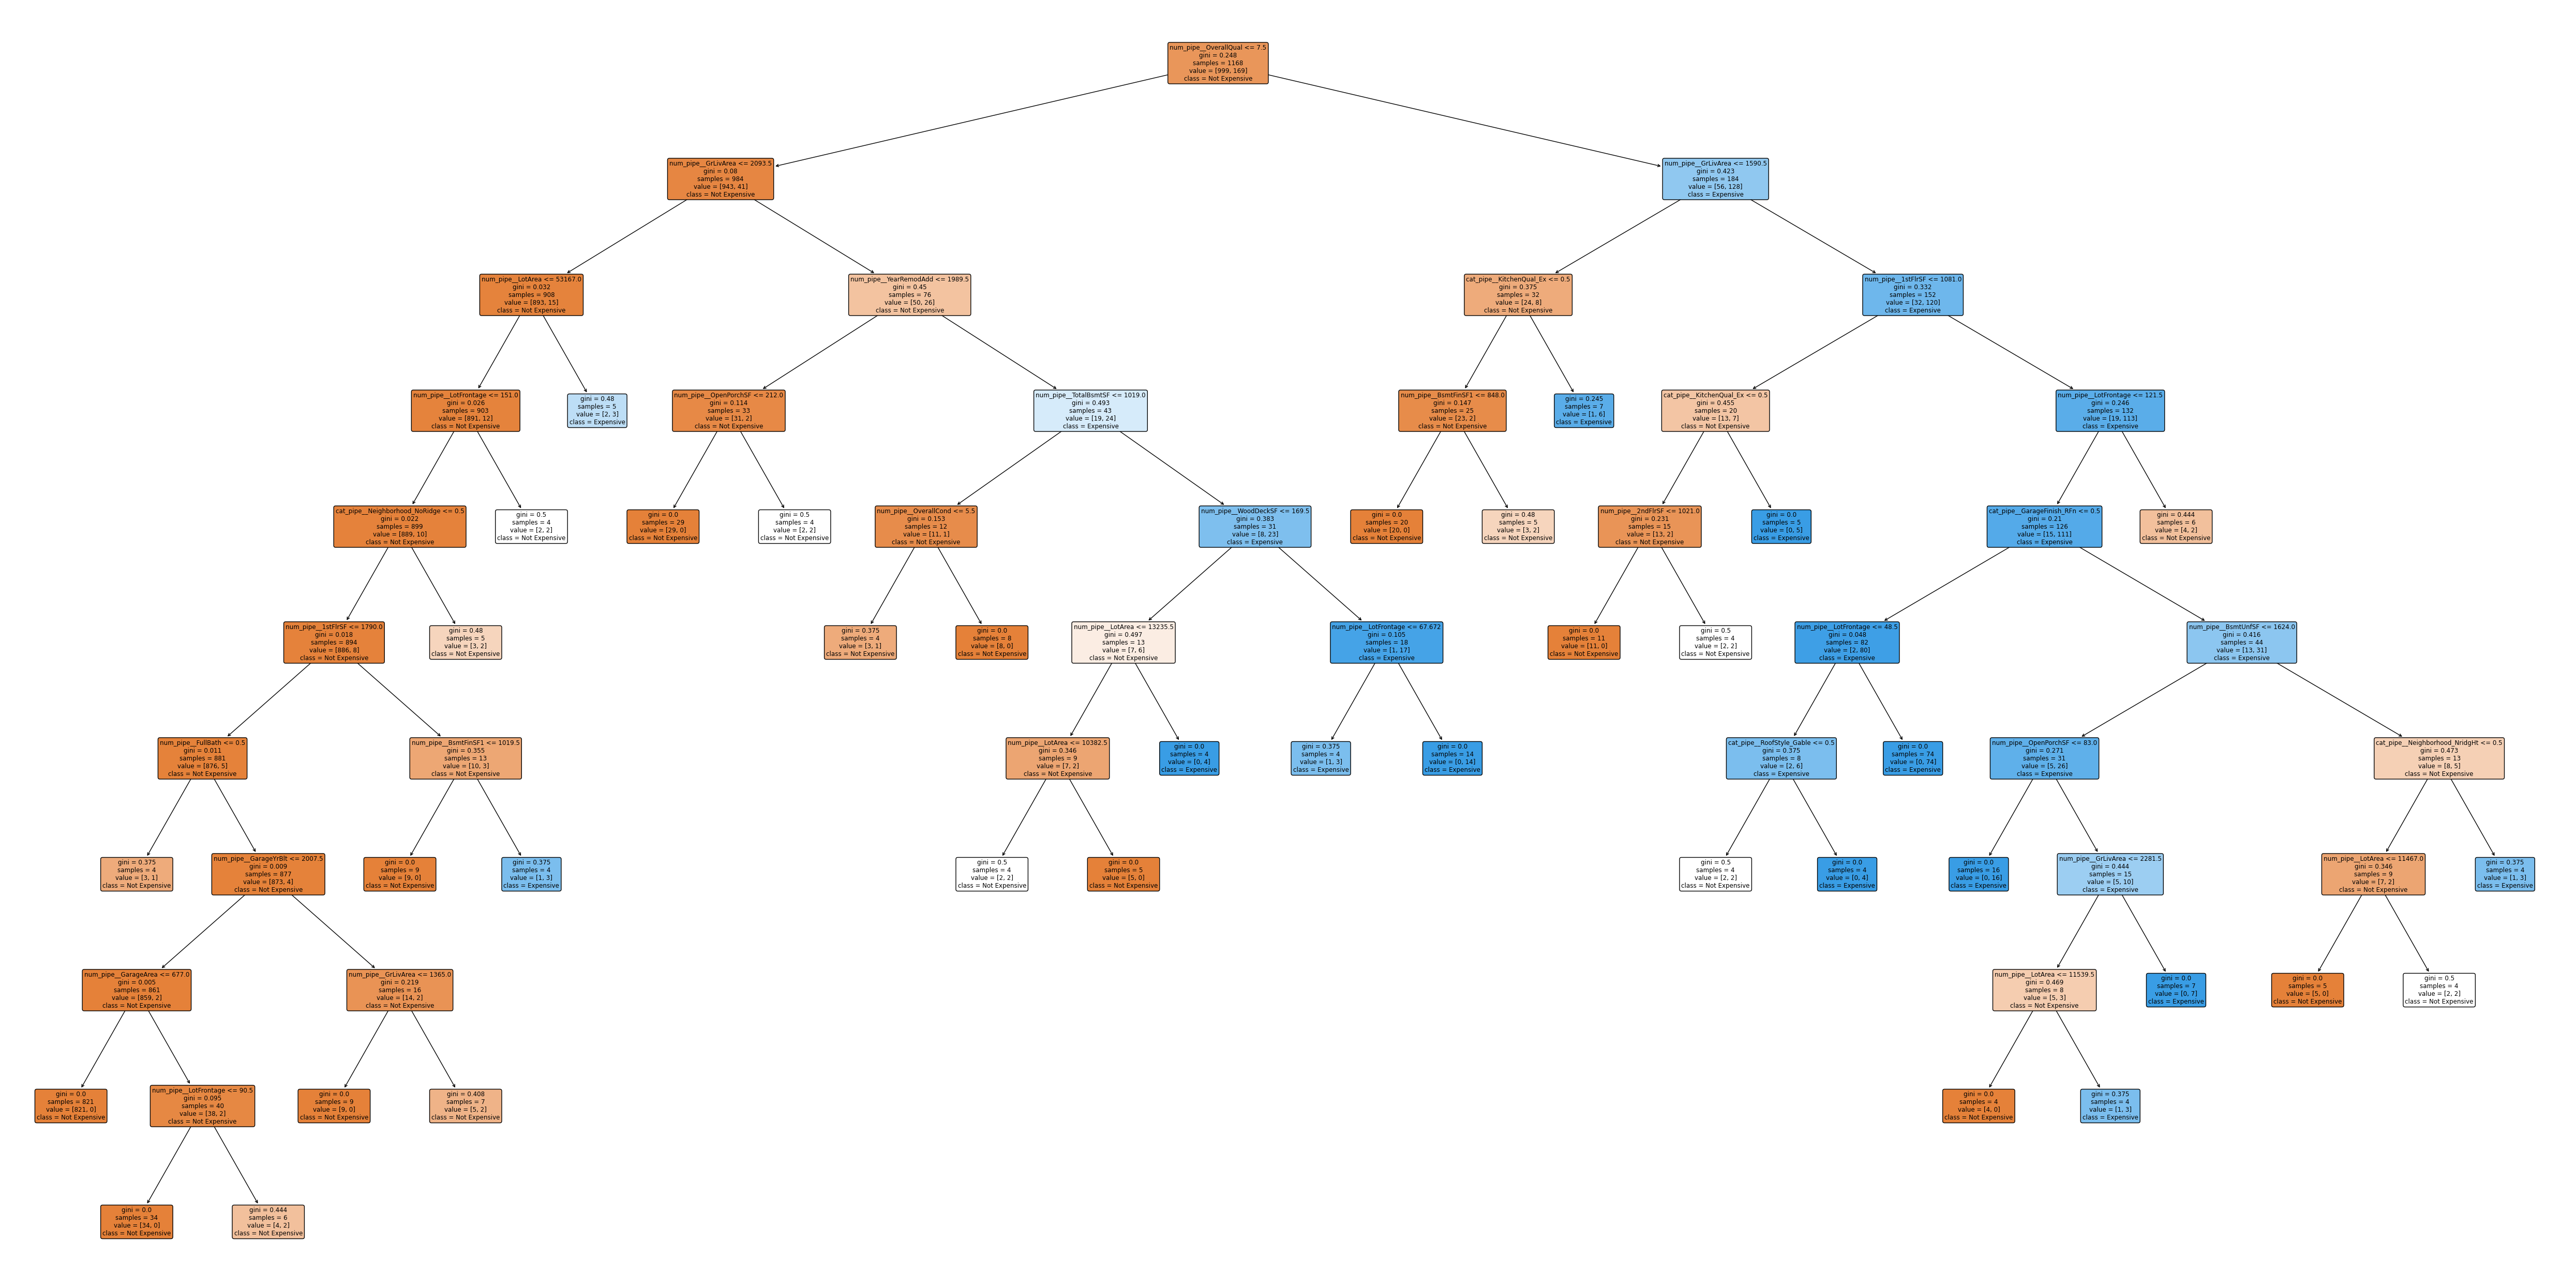

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline

# Check if the best model is a pipeline and extract the decision tree
if isinstance(best_tree_model, Pipeline):
    decision_tree = best_tree_model.named_steps['decisiontreeclassifier']
else:
    decision_tree = best_tree_model

# You need to fit the preprocessor to get transformed feature names
preprocessor.fit(X_train)
transformed_feature_names = preprocessor.get_feature_names_out()

# Plot the decision tree
plt.figure(figsize=(64, 32))
plot_tree(
    decision_tree,  # Use the fitted decision tree model
    filled=True,
    rounded=True,
    class_names=['Not Expensive', 'Expensive'],
    feature_names=transformed_feature_names
)
plt.show()


In [ ]:
#transformed_feature_names[1:3]

## 5. Using our model to predict values for unseen data

In [ ]:
# get the test-data

test_url = "https://drive.google.com/file/d/1MZnPvWoGQtBHij32Rti26C2T0KT1xGBc/view?usp=drive_link"
test_path = 'https://drive.google.com/uc?export=download&id='+test_url.split('/')[-2]
test = pd.read_csv(test_path)

In [ ]:
# set the id as index
test = test.set_index("Id")

Now make a prediction

In [ ]:
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAd...
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeclassifier__max_depth': range(2, 20, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(1, 10)},
             verbose=1)

In [ ]:
# we have to use .predict
test["Expensive"] = search.predict(test)

In [ ]:
#test.info()

In [ ]:
# Store the column "Id" and "SalePrice"  csv file

test = test.reset_index()

In [ ]:
 test[["Id", "SalePrice"]].to_csv("./submission_1.csv", index=False)

## 6. Build LogisticRegression, SVM and KNeighborsClassifier from sklearn.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Create separate pipelines for Logistic Regression and KNN similar to how you created for Decision Tree.

In [ ]:
# Logistic Regression pipeline
logreg_pipeline = make_pipeline(preprocessor, LogisticRegression())

# KNN pipeline
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())

# SVM pipeline
svm_pipeline = make_pipeline(preprocessor, SVC())

In [ ]:
# Parameter grid for Logistic Regression
param_grid_logreg = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "logisticregression__C": [0.1, 1, 10]  # Regularization parameter
}


param_grid_logreg

{'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
 'logisticregression__C': [0.1, 1, 10]}

In [ ]:
# Parameter grid for KNN
param_grid_knn = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(1, 10)  # Number of neighbors
}

param_grid_knn

{'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
 'kneighborsclassifier__n_neighbors': range(1, 10)}

##7 .GridSearchCV for each model with its corresponding pipeline and parameter grid.

In [ ]:
# Parameter grid for SVM
param_grid_svm = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "svc__kernel": ['rbf'],  # Consider only the RBF kernel
    "svc__C": [1, 10],  # Fewer options for the regularization parameter
    "svc__gamma": ['scale', 1]  # Fewer options for the kernel coefficient
}


In [ ]:
# GridSearchCV for Logistic Regression
search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, verbose=1)
search_logreg.fit(X_train, y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAd...
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'logisticregression__C': [0.1, 1, 10]},
             verbose=1)

In [ ]:
# GridSearchCV for KNN
search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, verbose=1)
search_knn.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAd...
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'kneighborsclassifier__n_neighbors': range(1, 10)},
             verbose=1)

In [ ]:
# GridSearchCV for SVM
search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, verbose=1,n_jobs=-1)
search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAd...
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'svc__C': [1, 10], 'svc__gamma': ['scale', 1],
                         'svc__kernel': ['rbf']},
             verbose=1)

After training, evaluate each model on the test set.

In [ ]:
# Evaluate Logistic Regression
y_train_pred_logreg = search_logreg.predict(X_train)
accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Evaluate KNN
y_train_pred_knn = search_knn.predict(X_train)
accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
print("KNN Accuracy:", accuracy_knn)


# Evaluate SVM
y_train_pred_svm = search_svm.predict(X_train)
accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
print("SVM Accuracy:", accuracy_svm)


Logistic Regression Accuracy: 0.9306506849315068
KNN Accuracy: 0.9323630136986302
SVM Accuracy: 0.922945205479452


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#  variables from your GridSearchCV for each model
best_model_dtree = search.best_estimator_
best_model_logreg = search_logreg.best_estimator_
best_model_knn = search_knn.best_estimator_
best_model_svm = search_svm.best_estimator_

# Print the values for the best models
#print(best_model_dtree)
#print(best_model_logreg)
#print(best_model_knn)


In [ ]:
models = {
    'Decision Tree': best_model_dtree,
    'Logistic Regression': best_model_logreg,
    'KNN': best_model_knn,
    'SVM': best_model_svm

}

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_train)

    # Calculate metrics
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    # Print the metrics
    print(f"Metrics for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_train, y_pred)
    print(f"Confusion Matrix:\n{cm}\n")


Metrics for Decision Tree:
Accuracy: 0.97
Precision: 0.95
Recall: 0.86
F1 Score: 0.90
Confusion Matrix:
[[992   7]
 [ 24 145]]

Metrics for Logistic Regression:
Accuracy: 0.93
Precision: 0.84
Recall: 0.64
F1 Score: 0.73
Confusion Matrix:
[[979  20]
 [ 61 108]]

Metrics for KNN:
Accuracy: 0.93
Precision: 0.92
Recall: 0.59
F1 Score: 0.71
Confusion Matrix:
[[990   9]
 [ 70  99]]

Metrics for SVM:
Accuracy: 0.92
Precision: 0.83
Recall: 0.59
F1 Score: 0.69
Confusion Matrix:
[[979  20]
 [ 70  99]]



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
model_names = []

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_train)  # Use X_test for evaluation

    # Calculate metrics
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    # Store the metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    model_names.append(name)


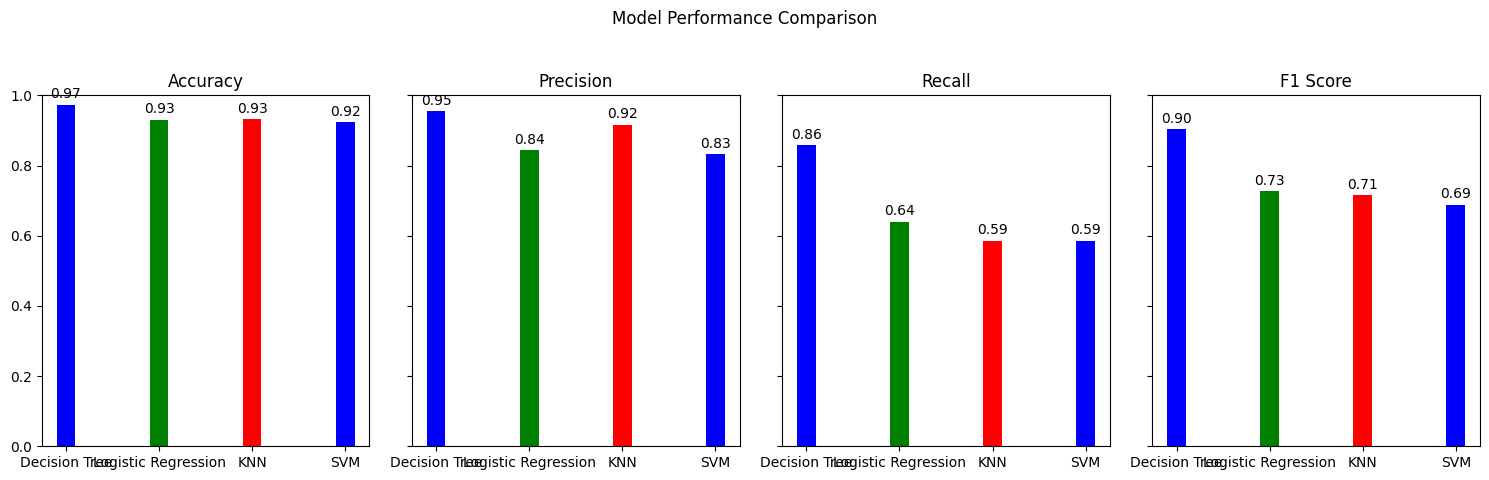

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Improved plotting function
def create_comparison_plot(metrics_lists, metric_names, model_names, title):
    n_metrics = len(metric_names)
    n_models = len(model_names)
    bar_width = 0.2
    colors = ['blue', 'green', 'red']

    # Create a subplot for each metric
    fig, axs = plt.subplots(1, n_metrics, figsize=(15, 5), sharey=True)
    fig.suptitle(title)

    # Iterate over each metric and create a bar plot
    for i, (metric_list, metric_name) in enumerate(zip(metrics_lists, metric_names)):
        indices = np.arange(n_models)
        axs[i].bar(indices, metric_list, bar_width, color=colors, label=model_names)
        axs[i].set_title(metric_name)
        axs[i].set_xticks(indices)
        axs[i].set_xticklabels(model_names)
        axs[i].set_ylim(0, 1)  # Assuming metric values are between 0 and 1
        for j, value in enumerate(metric_list):
            axs[i].text(j, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Call the improved plot function
metrics = [accuracy_list, precision_list, recall_list, f1_list]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
create_comparison_plot(metrics, metric_names, model_names, 'Model Performance Comparison')
